Epoch 1/2
1000/1000 [==============================] - 205s 204ms/step - loss: 1.8523 - accuracy: 0.3423 - val_loss: 1.7260 - val_accuracy: 0.4011
Epoch 2/2
1000/1000 [==============================] - 204s 204ms/step - loss: 1.6726 - accuracy: 0.4172 - val_loss: 1.6196 - val_accuracy: 0.4404


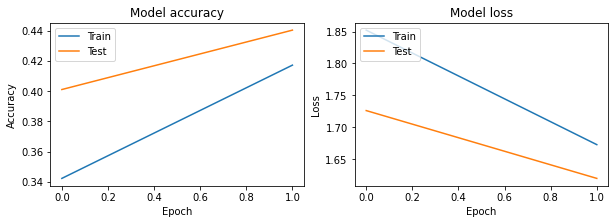

Epoch 1/2
500/500 [==============================] - 157s 313ms/step - loss: 1.9042 - accuracy: 0.3226 - val_loss: 1.7898 - val_accuracy: 0.3701
Epoch 2/2
500/500 [==============================] - 155s 311ms/step - loss: 1.7397 - accuracy: 0.3940 - val_loss: 1.6999 - val_accuracy: 0.4129


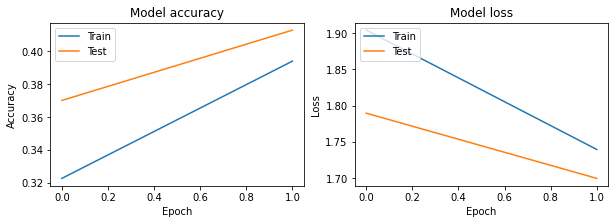

Epoch 1/2
500/500 [==============================] - 232s 463ms/step - loss: 1.8994 - accuracy: 0.3175 - val_loss: 1.7684 - val_accuracy: 0.3665
Epoch 2/2
500/500 [==============================] - 231s 462ms/step - loss: 1.7082 - accuracy: 0.3956 - val_loss: 1.6472 - val_accuracy: 0.4161


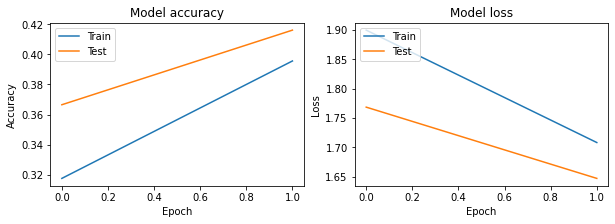

Epoch 1/2
500/500 [==============================] - 199s 397ms/step - loss: 1.5295 - accuracy: 0.4612 - val_loss: 1.2933 - val_accuracy: 0.5414
Epoch 2/2
500/500 [==============================] - 201s 402ms/step - loss: 1.1973 - accuracy: 0.5866 - val_loss: 1.1645 - val_accuracy: 0.5922


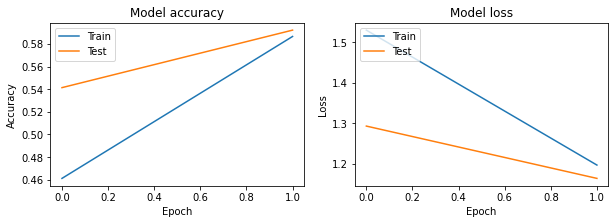

Epoch 1/2
500/500 [==============================] - 243s 484ms/step - loss: 1.6222 - accuracy: 0.4221 - val_loss: 1.3744 - val_accuracy: 0.5070
Epoch 2/2
500/500 [==============================] - 240s 481ms/step - loss: 1.2946 - accuracy: 0.5473 - val_loss: 1.2263 - val_accuracy: 0.5692


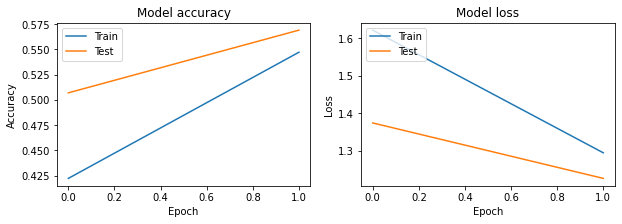

Epoch 1/2
500/500 [==============================] - 624s 1s/step - loss: 1.6134 - accuracy: 0.4265 - val_loss: 1.3197 - val_accuracy: 0.5299
Epoch 2/2
500/500 [==============================] - 626s 1s/step - loss: 1.2440 - accuracy: 0.5616 - val_loss: 1.1935 - val_accuracy: 0.5744


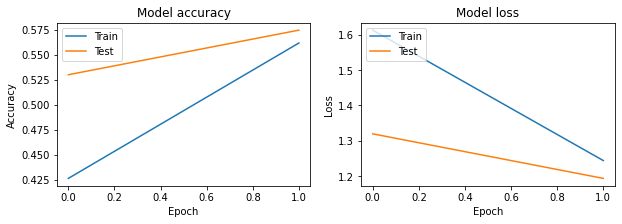

In [4]:
import numpy as np
import os
from keras.layers import Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

def locateBatchFiles(filename):
    pathFile = os.path.join("", filename)
    temp = openFile(pathFile)
    return temp

def openFile(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin')
    return dict

tb1 = locateBatchFiles('data_batch_1')
tb2 = locateBatchFiles('data_batch_2')
tb3 = locateBatchFiles('data_batch_3')
tb4 = locateBatchFiles('data_batch_4')
tb5 = locateBatchFiles('data_batch_5')
testBatch = locateBatchFiles('test_batch')

train_x = np.concatenate([tb1['data'], tb2['data'], tb3['data'], tb4['data'], tb5['data']])
train_x = train_x.astype('float32') # this is necessary for the division below
train_x /= 255
train_y = np.concatenate([np_utils.to_categorical(labels, 10) for labels in [tb1['labels'], tb2['labels'], tb3['labels'], tb4['labels'], tb5['labels']]])

test_x = testBatch['data'].astype('float32') / 255
test_y = np_utils.to_categorical(testBatch['labels'], 10)

def showingResult(title, history):
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    plt.plot(history.history["accuracy"])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def rnnOneLayerFifty(one_layer_rnn, train_x, train_y):
  one_layer_rnn.add(Dense(10_000, input_shape=(32*32*3,), activation='relu'))
  one_layer_rnn.add(Dense(10, activation='softmax'))
  one_layer_rnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
  one_layer_rnn_result = one_layer_rnn.fit(train_x, train_y, batch_size=50, epochs=10, validation_data=(test_x, test_y))
  return one_layer_rnn_result
  

def rnnMultipleLayers(multiple_layers_rnn, train_x, train_y):
  multiple_layers_rnn.add(Dense(10_000, input_shape=(32*32*3,), activation='relu'))
  multiple_layers_rnn.add(Dense(1_000, activation='relu'))
  multiple_layers_rnn.add(Dense(100, activation='relu'))
  multiple_layers_rnn.add(Dense(10, activation='softmax'))
  multiple_layers_rnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
  multiple_layers_rnn_result = multiple_layers_rnn.fit(train_x, train_y, batch_size=100, epochs=10, validation_data=(test_x, test_y))
  return multiple_layers_rnn_result


def rnnOneLayerHundred(rnn, train_x, train_y):
  rnn.add(Dense(10_000, input_shape=(32*32*3,), activation='relu'))
  rnn.add(Dense(10, activation='softmax'))
  rnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
  one_layer_rnn_hun = rnn.fit(train_x, train_y, batch_size=100, epochs=10, validation_data=(test_x, test_y))
  return one_layer_rnn_hun


def cnnThreeLayers(three_layers_cnn, train_x_reshaped, train_y):
  three_layers_cnn.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
  three_layers_cnn.add(Conv2D(32, (3,3), activation='relu'))
  three_layers_cnn.add(Conv2D(32, (3,3), activation='relu'))
  three_layers_cnn.add(Flatten())
  three_layers_cnn.add(Dense(10, activation='softmax'))
  three_layers_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  cnn_history = three_layers_cnn.fit(train_x_reshaped, train_y, batch_size=100, epochs=10, validation_data=(test_x_reshaped, test_y))
  return cnn_history


def cnnDropOutLayers(dropout_layers_cnn, train_x_reshaped, train_y):
  dropout_layers_cnn.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
  dropout_layers_cnn.add(Dropout(0.2))
  dropout_layers_cnn.add(Conv2D(32, (3,3), activation='relu'))
  dropout_layers_cnn.add(Dropout(0.2))
  dropout_layers_cnn.add(Conv2D(32, (3,3), activation='relu'))
  dropout_layers_cnn.add(Dropout(0.2))
  dropout_layers_cnn.add(Flatten())
  dropout_layers_cnn.add(Dense(10, activation='softmax'))
  dropout_layers_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  dropout_layers_cnn_result = dropout_layers_cnn.fit(train_x_reshaped, train_y, batch_size=100, epochs=10, validation_data=(test_x_reshaped, test_y))
  return dropout_layers_cnn_result


def cnnFilterLayers(filters_layers_cnn, train_x_reshaped, train_y):
  filters_layers_cnn.add(Conv2D(64, (3,3), input_shape=(32,32,3), activation='relu'))
  filters_layers_cnn.add(Dropout(0.2))
  filters_layers_cnn.add(Conv2D(64, (3,3), activation='relu'))
  filters_layers_cnn.add(Dropout(0.2))
  filters_layers_cnn.add(Conv2D(64, (3,3), activation='relu'))
  filters_layers_cnn.add(Dropout(0.2))
  filters_layers_cnn.add(Flatten())
  filters_layers_cnn.add(Dense(128, activation='relu'))
  filters_layers_cnn.add(Dense(10, activation='softmax'))
  filters_layers_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  filters_layers_cnn_result = filters_layers_cnn.fit(train_x_reshaped, train_y, batch_size=100, epochs=10, validation_data=(test_x_reshaped, test_y))
  return filters_layers_cnn_result


one_layer_rnn = Sequential()
one_layer_rnn_result = rnnOneLayerFifty(one_layer_rnn, train_x, train_y)
showingResult('RNN with 50 batch size', one_layer_rnn_result)

rnn = Sequential()
one_layer_rnn_hun = rnnOneLayerHundred(rnn, train_x, train_y)
showingResult('RNN with 100 batch size', one_layer_rnn_hun)

multiple_layers_rnn = Sequential()
multiple_layers_rnn_result = rnnMultipleLayers(multiple_layers_rnn, train_x, train_y)
showingResult('RNN with more layers', multiple_layers_rnn_result)

train_x_reshaped = train_x.reshape(len(train_x), 32, 32, 3)
test_x_reshaped = test_x.reshape(len(test_x), 32, 32, 3)

three_layers_cnn = Sequential()
cnn_history = cnnThreeLayers(three_layers_cnn, train_x_reshaped, train_y)
showingResult('CNN with 3 convolution layers', cnn_history)

dropout_layers_cnn = Sequential()
dropout_layers_cnn_result = cnnDropOutLayers(dropout_layers_cnn, train_x_reshaped, train_y)
showingResult('3 convolution layers with dropout', dropout_layers_cnn_result)

filters_layers_cnn = Sequential()
filters_layers_cnn_result = cnnFilterLayers(filters_layers_cnn, train_x_reshaped, train_y)
showingResult('CNN with more layers and filters', filters_layers_cnn_result)
